In [1]:
import numpy as np
from time import time

In [2]:
obj = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
obj = np.array(obj)

In [3]:
obj

array([[0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0]])

In [4]:
def pi(a):
    for i in range(len(a)):
        if a[i] == np.nan:
            a[i] = 0
            
    s = np.nansum(a)
    if s == 0:
        s = 1e-5
        print('here')
    for i in range(len(a)):
        a[i] /= s
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [5]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [6]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        a_next = action(s_next)
        v[s][a] = v[s][a] + lr * (r + gamma*v[s_next][a_next] - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [7]:
def is_wall(s):
    if s[0] < 0 or s[0] > 3:
        return True
    elif s[1] < 0 or s[1] > 4:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [8]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps -= 0.01
        temp_hist.append(s)
#         print(s)
        a = action(s)
        s_next = state_map(s, a)
#         print(a, s, s_next)
        
#         if (0 > s[0] or s[0] > 3) or (0 > s[1] or s[1] > 4) or obj[s] == 1: ## 가면 안되는 곳
        if is_wall(s_next):
            fail_hist.append((s, s_next))
#             r = -1
            v[s][a] = 0
            v[s] = pi(v[s])
#             v = update(s, a, r, s_next, v)
#             print(v[s], s_next)
            s_next = (0, 0)
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
            
#         print(v[s])
        fake_obj[s_next] = 2
#         print(fake_obj)
        fake_obj[s_next] = obj[s_next]
#         print(eps)
            
        s = s_next
        
    hist.append(temp_hist)

In [9]:
shape = obj.shape
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)

In [27]:
lr = 0.1
eps = 0.5
gamma = 0.95
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()
k = float('inf')
c = 0

s_0 = (0, 0)
goal = (3, 4)

start = time()
for e in range(100):
    play(s_0)
    new_k = len(hist[-1])
    if new_k <= k and new_k != float('inf'):
        c += 1
        k = new_k
        if c == 10:
            break
    else:
        k = float('inf')
        c = 0
        
    eps = (0.5 ** (e+1))
    print(eps)

            
#     print(e, '###################### \n')
#     print('succes', i)
#     print(eps)
#     eps = 0.5

lt = time() - start

0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06
3.814697265625e-06
1.9073486328125e-06
9.5367431640625e-07
4.76837158203125e-07
2.384185791015625e-07
1.1920928955078125e-07
5.960464477539063e-08
2.9802322387695312e-08
1.4901161193847656e-08
7.450580596923828e-09
3.725290298461914e-09
1.862645149230957e-09
9.313225746154785e-10
4.656612873077393e-10
2.3283064365386963e-10
1.1641532182693481e-10
5.820766091346741e-11
2.9103830456733704e-11
1.4551915228366852e-11
7.275957614183426e-12
3.637978807091713e-12
1.8189894035458565e-12


In [28]:
for i in range(shape[1]):
    for j in range(shape[0]):
        v[j][i] /= np.sum(v[j][i])
v

array([[[0.        , 0.47511684, 0.        , 0.52488316],
        [0.        , 0.        , 0.40683735, 0.59316265],
        [0.        , 0.        , 0.33921068, 0.66078932],
        [0.        , 0.70481464, 0.29518536, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.51733475, 0.48266525, 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.20078957, 0.59792014, 0.        , 0.20129029],
        [0.        , 0.52172761, 0.47827239, 0.        ]],

       [[0.33295739, 0.33407822, 0.        , 0.33296438],
        [0.        , 0.50026561, 0.49973439, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.22366872, 0.        , 0.        , 0.77633128],
        [0.14334786, 0.56897537, 0.14383839, 0.14383839]],

       [[0.49924797, 0.        , 0.        , 0.50075203],
        [0.5003931 , 0.        , 0.4996069 , 0.        ],
        

In [29]:
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]

In [ ]:
eps

In [12]:
lt

1.6081063747406006

In [17]:
c = 0
for h in hist:
    if len(h) == 7:
        c += 1
        
print(c)

0


In [30]:
lh = list(map(lambda x: len(x), hist))

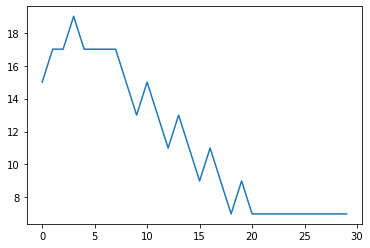

In [31]:
import matplotlib.pyplot as plt

plt.plot(lh[10:])

In [32]:
len(lh)

40

In [ ]:
plt.plot()